
# ***항만 도시와 내륙 도시의 월별 대기오염물질 농도 차이 연구 : 경상남도를 중심으로***





### **경상남도 설정 이유**

- 항만 도시와 내륙 도시를 비슷한 개수만큼 가지고 있기 때문이다.
- 항만 도시 7곳
    - 거제시, 고성군, 남해군, 사천시, 창원시, 통영시, 하동군

- 내륙 도시 11곳
    - 거창군, 김해시, 밀양시, 산청군, 양산시, 의령군, 진주시, 창녕군, 함안군, 함양군, 합천군

### **주요 질문**

---


1. 경남의 주요 항만도시와 내륙도시 간 NO2 월평균 농도 차이는 어떻게 나타나는가?
    - NO2 농도 차이를 월별로 비교하여 계절별 특성 및 농도 변화 패턴을 파악  


2. 해륙풍이 활발한 여름철과 북서풍이 우세한 겨울철 간 O3 농도 패턴은 어떻게 다른가?
    - 해륙풍과 북서풍이 O3 농도에 미치는 영향 분석  


3. 항만도시의 CO 농도가 출퇴근 시간대와 선박 입출항 시간대에 어떤 차이를 보이는가?
    - 교통량과 선박 활동이 CO 농도에 미치는 영향을 분석  



---

### **기본적인 데이터 전처리**

In [145]:
# 시각화 때 한글 사용을 위해 글씨 다운로드 (출력 숨기기)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
# 필요 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

In [2]:
# xlsx 파일보다 CSV 파일이 더 빠르게 작업이 가능하기에 모든 xlsx 파일을 CSV 파일로 저장하기

# 12개의 엑셀 파일 모두 csv로 변환
# 단, 경남 데이터만 사용할 것이므로 경남 데이터만 남겨서 저장
for month in range(1, 13) :
    # 엑셀 파일 읽기
    excel_path = f'/content/drive/MyDrive/빅데이터/엑셀 파일/2023년 {month}월.xlsx'
    df = pd.read_excel(excel_path)

    # 지역이 '경남'으로 시작하고 측정망이 '도시대기'인 데이터 행만 df_Gyeongnam으로 저장
    df_Gyeongnam = df[df['지역'].str.startswith('경남') & (df['망'] == '도시대기')]

    # csv로 저장할 경로
    csv_path = f'/content/drive/MyDrive/빅데이터/CSV_경남/2023_{month}_경남.csv'

    # df_Gyeongnam을 csv로 저장
    df_Gyeongnam.to_csv(csv_path, index=False, encoding='utf-8-sig')

    # 데이터 저장되면 출력하기
    print(f'{month}월 완료')

1월 완료
2월 완료
3월 완료
4월 완료
5월 완료
6월 완료
7월 완료
8월 완료
9월 완료
10월 완료
11월 완료
12월 완료


In [3]:
# 1월부터 12월 데이터 합치기

# 12개 파일 경로 리스트로 변환
file_paths = [f'/content/drive/MyDrive/빅데이터/CSV_경남/2023_{month}_경남.csv' for month in range(1, 13)]

# csv 결합시키기
df = pd.concat([pd.read_csv(file) for file in file_paths])
df

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,경남 창원시,도시대기,238111,회원동,2023010101,0.0020,0.40,0.026,0.022,32.0,27.0,경남 창원시 마산회원구 회원동 11번길 7
1,경남 창원시,도시대기,238111,회원동,2023010102,0.0020,0.40,0.028,0.019,29.0,28.0,경남 창원시 마산회원구 회원동 11번길 7
2,경남 창원시,도시대기,238111,회원동,2023010103,0.0030,0.50,0.025,0.020,33.0,24.0,경남 창원시 마산회원구 회원동 11번길 7
3,경남 창원시,도시대기,238111,회원동,2023010104,0.0030,0.50,0.017,0.026,34.0,32.0,경남 창원시 마산회원구 회원동 11번길 7
4,경남 창원시,도시대기,238111,회원동,2023010105,0.0030,0.50,0.019,0.025,37.0,25.0,경남 창원시 마산회원구 회원동 11번길 7
...,...,...,...,...,...,...,...,...,...,...,...,...
28267,경남 합천군,도시대기,238511,합천읍,2023123120,0.0025,0.47,0.032,0.012,13.0,11.0,경상남도 합천군 합천읍 대야로 888-20
28268,경남 합천군,도시대기,238511,합천읍,2023123121,0.0029,0.47,0.033,0.009,12.0,12.0,경상남도 합천군 합천읍 대야로 888-20
28269,경남 합천군,도시대기,238511,합천읍,2023123122,0.0025,0.46,0.033,0.009,13.0,15.0,경상남도 합천군 합천읍 대야로 888-20
28270,경남 합천군,도시대기,238511,합천읍,2023123123,0.0025,0.47,0.030,0.009,16.0,14.0,경상남도 합천군 합천읍 대야로 888-20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332880 entries, 0 to 28271
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      332880 non-null  object 
 1   망       332880 non-null  object 
 2   측정소코드   332880 non-null  int64  
 3   측정소명    332880 non-null  object 
 4   측정일시    332880 non-null  int64  
 5   SO2     322314 non-null  float64
 6   CO      316808 non-null  float64
 7   O3      323113 non-null  float64
 8   NO2     318302 non-null  float64
 9   PM10    317801 non-null  float64
 10  PM25    315681 non-null  float64
 11  주소      332880 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 33.0+ MB


#### **1. 필요 없는 칼럼 지우기**
- 망은 모두 '도시대기'이므로 삭제
- 측정소는 특정 측정소를 다루는 분석이 아니기에 삭제
- 주소는 상세 주소보다는 지역 '시'가 중요한 것이므로 삭제

In [5]:
df.drop(columns=['망', '측정소명', '주소'], inplace=True)

df

,지역,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,경남 창원시,238111,2023010101,0.0020,0.40,0.026,0.022,32.0,27.0
1,경남 창원시,238111,2023010102,0.0020,0.40,0.028,0.019,29.0,28.0
2,경남 창원시,238111,2023010103,0.0030,0.50,0.025,0.020,33.0,24.0
3,경남 창원시,238111,2023010104,0.0030,0.50,0.017,0.026,34.0,32.0
4,경남 창원시,238111,2023010105,0.0030,0.50,0.019,0.025,37.0,25.0
...,...,...,...,...,...,...,...,...,...
28267,경남 합천군,238511,2023123120,0.0025,0.47,0.032,0.012,13.0,11.0
28268,경남 합천군,238511,2023123121,0.0029,0.47,0.033,0.009,12.0,12.0
28269,경남 합천군,238511,2023123122,0.0025,0.46,0.033,0.009,13.0,15.0
28270,경남 합천군,238511,2023123123,0.0025,0.47,0.030,0.009,16.0,14.0


#### **2. 데이터 가공하기**


**측정일시 연/월/시간으로 구분**
- 연은 2023이므로 제외

In [6]:
# 측정일시를 연월일시로 구분

# datetime으로 바꾸기에는 24시인 경우를 00으로 처리해야 하지만
# 원래 데이터를 최대한 유지하고자 문자열로 변환 후 추출 진행

# 측정일시를 문자열로 변환
df['측정일시'] = df['측정일시'].astype(str)

# 측정일시에서 월/일/시간 컬럼을 각각 추출
df['월'] = df['측정일시'].str[4:6].astype(int)  # 5~6자리 : 월
df['일'] = df['측정일시'].str[6:8].astype(int)  # 7~8자리 : 일
df['시간'] = df['측정일시'].str[8:10].astype(int)  # 9~10자리 :시간

# 원래 측정일시 열 drop
df.drop(columns=['측정일시'], inplace=True)

df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간
0,경남 창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1
1,경남 창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2
2,경남 창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3
3,경남 창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4
4,경남 창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
28267,경남 합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20
28268,경남 합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21
28269,경남 합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22
28270,경남 합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23


**지역 이름 시/군 이름만 남기기**
- 경남은 모두 다 경남이니까 필요없음

In [7]:
# 지역 -> 시/군 이름으로 변경

df['지역'] = df['지역'].apply(lambda x: x.split()[1]) # 단어를 나누어 첫 번째 단어로만 남기기

df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23


#### **3. 필요한 칼럼 생성하기**


**계절 : 계절별 특성을 파악할 예정이기에 생성**

In [8]:
# 계절 칼럼 추가하기

# 봄, 여름, 가을, 겨울 칼럼 추가 함수
def get_season(month):
    if month in [3, 4, 5]: # 3~5월 : 봄
        return 'spring'
    elif month in [6, 7, 8]: # 6~8월 : 여름
        return 'summer'
    elif month in [9, 10, 11]: # 9~11월 : 가을
        return 'autumn'
    else:  # [12, 1, 2] # 12~2월 : 겨울
        return 'winter'

# 계절 함수 적용
df['계절'] = df['월'].apply(get_season)
df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter


**도시 : 항만 도시인지 내륙 도시인지 구분하기 위해 생성**

In [9]:
# 도시 유형 나누기

# 항만 도시, 내륙 도시 리스트 만들기
port_cities = ['거제시', '고성군', '남해군', '사천시', '창원시', '통영시', '하동군'] # 항만
inland_cities = ['거창군', '김해시', '밀양시', '산청군', '양산시', '의령군', '진주시', '창녕군', '함안군', '함양군', '합천군'] # 내륙

# 항만 도시, 내륙 도시 칼럼 추가 함수
def get_city(city):
    if city in port_cities:
        return '항만'
    else : # inland_cities
        return '내륙'

#  함수 적용
df['도시 유형'] = df['지역'].apply(get_city)
df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


#### **4.Null값 처리하기**







In [10]:
# null값 개수 파악하기
df.isnull().sum()

,0
지역,0
측정소코드,0
SO2,10566
CO,16072
O3,9767
NO2,14578
PM10,15079
PM25,17199
월,0
일,0


- 값을 지역, 월, 시간이 같은 데이터의 중앙값을 사용하여 지역적 특성과 계절적 특성을 모두 고려할 예정

In [11]:
# Null 값 처리하기 지역, 월, 시간이 같은 값의 중앙값으로 대체하기

# 처리할 칼럼
pollution_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

# 각 오염물질별로 결측치 처리
for column in pollution_columns:
    # 지역, 월, 시간별로 그룹화
    grouped_data = df.groupby(['지역', '월', '시간'])

    # 각 칼럼의 중앙값 구하기
    median_values = grouped_data[column].transform('median')

    # 결측값 중앙값으로 채우기
    df[column] = df[column].fillna(median_values)

df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


In [12]:
df.isnull().sum()

,0
지역,0
측정소코드,0
SO2,744
CO,2232
O3,744
NO2,2232
PM10,2208
PM25,2208
월,0
일,0


- 해당 지역의 월, 시간대의 모든 값이 없는 경우는 null값이 계속 존재한다.
- 이에, 봄(3\~5월)에 해당하면 해당 값(3\~5월)의 중앙값으로 대체한다. 여름은 6\~8월, 가을은 9월\~11월, 겨울은 12~2월이다.
- => 이는 최대한 계절적 요인을 적용하기 위해서이다.

In [13]:
# 각 오염물질별로 결측치 처리
for column in pollution_columns:
    # 계절별 중앙값 계산
    seasonal_medians = df.groupby('계절')[column].transform('median')

    # 계절별 중앙값으로 결측값 채우기
    df[column] = df[column].fillna(seasonal_medians)

df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


In [14]:
df.isnull().sum()

,0
지역,0
측정소코드,0
SO2,0
CO,0
O3,0
NO2,0
PM10,0
PM25,0
월,0
일,0


In [15]:
df

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


> 주요 질문의 공통 전처리는 끝이며, 각 질문에 따라 해당 df를 복제해서 사용할 것이다.  



> 또한, 각 질문에 맞는 전처리는 따로 진행할 것이다.







---


### **1. 경남의 주요 항만도시와 내륙도시 간 NO2 월평균 농도 차이는 어떻게 나타나는가?**

항만 도시와 내륙 도시 간 NO2 농도 차이를 비교하는 이유는 지역적 특성이나 환경적 요인이 NO2 농도에 미치는 영향을 이해하기 위해서입니다. 예를 들어, 항만 도시는 교통량과 산업 활동이 많아 NO2 농도가 높을 가능성이 큽니다. 반면, 내륙 도시는 교통량이나 산업 활동의 정도에 따라 NO2 농도가 달라질 수 있습니다. 이러한 차이를 파악함으로써 각 지역의 환경적 특성을 분석하고자 합니다.

In [16]:
# 기본 전처리 데이터프레임 복제
df_Q1 = df.copy()

In [17]:
df_Q1

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


**히트맵 시각화**

- 먼저, 모든 시/군이 나오게 히트맵을 그릴 것이며, 항만 도시와 내륙 도시를 나누어서 히트맵을 그릴 것이다.
- (개별 도시 별 평균)

In [18]:
# NanumGothic 폰트로 설정
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [19]:
# 히트맵 그리기

# '항만 도시'와 '내륙 도시' 데이터 필터링
df_port = df_Q1[df_Q1['도시 유형'] == '항만'] # 항만 도시
df_inland = df_Q1[df_Q1['도시 유형'] == '내륙'] # 내륙 도시

# 피봇테이블 생성 (지역 월별 NO2 평균 값으로)
heatmap_data_port = df_port.pivot_table(index='지역', columns='월', values='NO2', aggfunc='mean') # 항만 도시 피봇테이블
heatmap_data_inland = df_inland.pivot_table(index='지역', columns='월', values='NO2', aggfunc='mean') # 내륙 도시 피봇테이블

In [20]:
heatmap_data_port

월,1,2,3,4,5,6,7,8,9,10,11,12
지역,,,,,,,,,,,,
거제시,0.014097,0.014915,0.012147,0.007603,0.007593,0.007797,0.007746,0.006525,0.008538,0.009151,0.010400,0.012148
고성군,0.014789,0.013628,0.012400,0.009753,0.008015,0.007161,0.006185,0.006002,0.007212,0.009583,0.010860,0.013828
남해군,0.011366,0.011237,0.010661,0.007775,0.006790,0.006854,0.005157,0.005126,0.005450,0.007383,0.007808,0.009323
사천시,0.014787,0.014856,0.014384,0.009963,0.009055,0.011797,0.008108,0.005696,0.005754,0.007752,0.011026,0.014711
창원시,0.022800,0.023179,0.020942,0.013527,0.013643,0.012711,0.012871,0.011301,0.012243,0.015289,0.018374,0.021705
통영시,0.022265,0.020595,0.017085,0.011654,0.010135,0.009112,0.008109,0.007194,0.008629,0.012315,0.013325,0.016909
하동군,0.010849,0.011571,0.014463,0.009235,0.010185,0.009858,0.010958,0.008296,0.007573,0.008412,0.010033,0.011933


In [21]:
heatmap_data_inland

월,1,2,3,4,5,6,7,8,9,10,11,12
지역,,,,,,,,,,,,
거창군,0.017911,0.018375,0.018054,0.012656,0.010705,0.008183,0.005911,0.006258,0.007029,0.010021,0.011454,0.013291
김해시,0.022968,0.025392,0.023787,0.016099,0.016886,0.015901,0.015843,0.013791,0.014930,0.018816,0.018738,0.022070
밀양시,0.018551,0.017275,0.015488,0.010925,0.009592,0.008753,0.008122,0.007274,0.007740,0.010406,0.014657,0.016631
산청군,0.011240,0.013326,0.013085,0.008290,0.011000,0.006196,0.005503,0.004581,0.005810,0.006629,0.007846,0.009567
양산시,0.022156,0.022385,0.020966,0.013787,0.014114,0.013118,0.012496,0.011256,0.012198,0.016856,0.018234,0.020555
의령군,0.011367,0.011185,0.010624,0.008815,0.009388,0.010628,0.009000,0.009000,0.013489,0.011366,0.011218,0.013206
진주시,0.021151,0.018702,0.018541,0.013522,0.012342,0.009706,0.009571,0.008296,0.008239,0.012065,0.015495,0.018558
창녕군,0.016382,0.016577,0.015486,0.010729,0.010536,0.009718,0.009476,0.009966,0.011536,0.014403,0.012671,0.016329
함안군,0.015495,0.015363,0.013758,0.009736,0.007522,0.006468,0.005222,0.005427,0.006526,0.007945,0.010958,0.014380


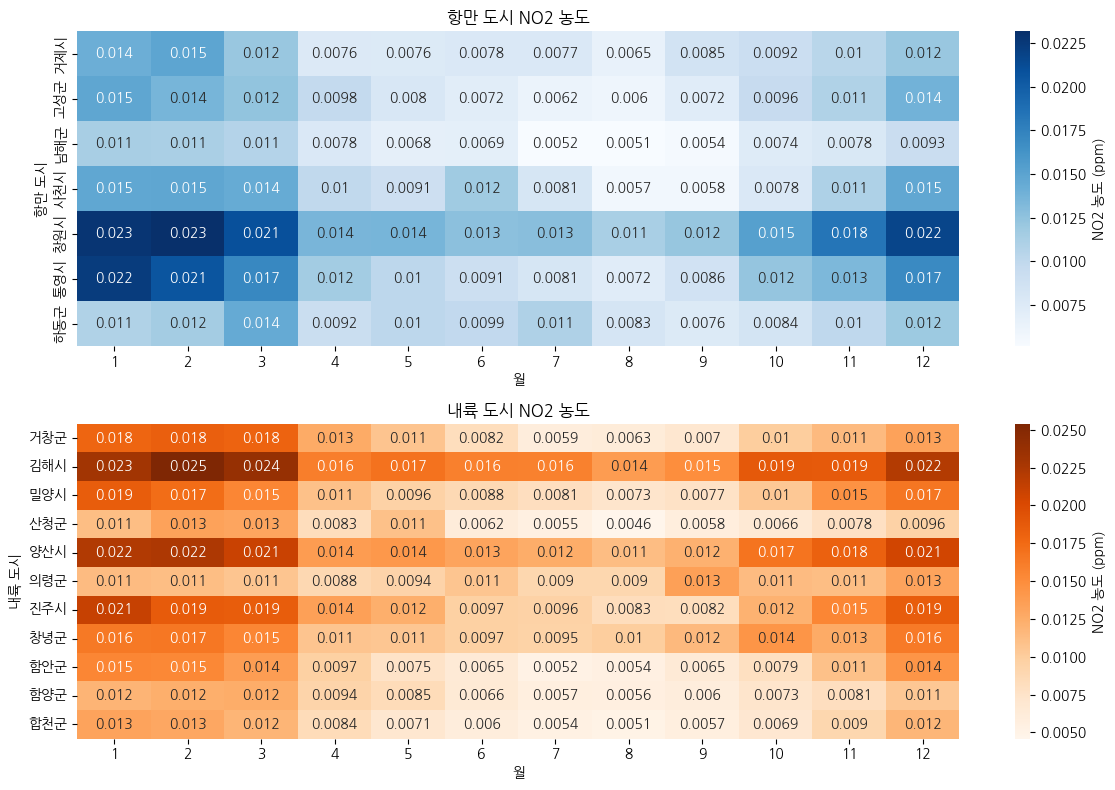

In [22]:
# 두 히트맵을 각각 다른 색상 팔레트로 세로로 배치
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # 2행 1열로 배치

# 항만 도시 히트맵 (파란색 계열)
sns.heatmap(heatmap_data_port, annot=True, cmap='Blues', cbar_kws={'label': 'NO2 농도 (ppm)'}, ax=ax1)
ax1.set_title('항만 도시 NO2 농도')
ax1.set_xlabel('월')
ax1.set_ylabel('항만 도시')

# 내륙 도시 히트맵 (주황색 계열)
sns.heatmap(heatmap_data_inland, annot=True, cmap='Oranges', cbar_kws={'label': 'NO2 농도 (ppm)'}, ax=ax2)
ax2.set_title('내륙 도시 NO2 농도')
ax2.set_xlabel('월')
ax2.set_ylabel('내륙 도시')

# 레이아웃 조정 (세로 배치에서 간격 조정)
plt.tight_layout()

# 히트맵 출력
plt.show()

- 항만 도시와 내륙 도시만 나누어서 히트맵
- (도시 유형별 평균)

In [23]:
# '도시유형' 컬럼을 기준으로 피벗 테이블 생성
heatmap_data = df_Q1.pivot_table(index='도시 유형', columns='월', values='NO2', aggfunc='mean')

heatmap_data

월,1,2,3,4,5,6,7,8,9,10,11,12
도시 유형,,,,,,,,,,,,
내륙,0.018900,0.018996,0.018054,0.012569,0.012291,0.010754,0.01018,0.009224,0.010164,0.013113,0.014605,0.017362
항만,0.018731,0.018944,0.017450,0.011477,0.011318,0.011008,0.01062,0.009072,0.009866,0.012253,0.014666,0.017616


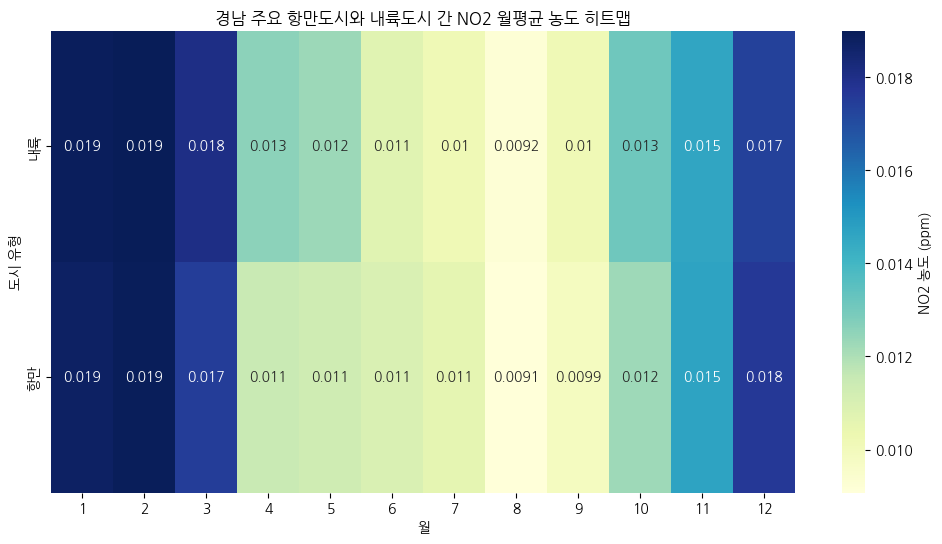

In [24]:
# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'NO2 농도 (ppm)'})
plt.title('경남 주요 항만도시와 내륙도시 간 NO2 월평균 농도 히트맵')
plt.xlabel('월')
plt.ylabel('도시 유형')
plt.show()

#### **질문 1. 그래프 해석**

**[ *질문 : 경남의 주요 항만도시와 내륙도시 간 NO2 월평균 농도 차이는 어떻게 나타나는가?* ]**



**항만 도시와 내륙 도시의 NO2 농도 특성**.

1. **항만 도시**
- 창원시가 연간 가장 높은 NO2 농도를 보이며, 특히 1\~2월에 0.023ppm으로 최고치를 기록했습니다.
- 남해군은 연간 대체로 다른 도시에 비해 가장 낮은 NO2 농도를 기록했으며, 1\~2월에는 농도가 높은 반면 6\~9월에는 낮은 농도를 보입니다.

2. **내륙 도시**
- 김해시와 양산시가 연중 높은 NO2 농도를 보이며, 1\~2월에는 0.022ppm\~0.025ppm을 기록했습니다.
- 대부분의 내륙 도시는 겨울철의 NO2 농도가 높고, 여름철에 NO2 농도가 낮으며 계절 간 차이가 뚜렷합니다.   
하지만, ***의령군은 겨울철에는 다른 내륙 도시에 비해 NO2 농도가 낮지만, 여름철에도 겨울철의 NO2와 비슷하며 다른 도시에 비해 계절 간 차이가 작습니다.***  

**항만 도시와 내륙 도시의 NO2 농도 변화 패턴 및 농도 차이**

- **계절적 변화**: 두 도시 유형 모두 10월부터 NO2 농도가 서서히 증가하여 1, 2월에 정점을 찍은 후, 3월부터 다시 감소하는 추세를 보입니다. 이는 겨울철 난방 연료 사용 증가와 같은 계절적 요인의 영향으로 추정됩니다.

- **농도 안정성**: 내륙 도시는 4월부터 9월까지 전반적으로 NO2 농도가 일정하게 낮게 유지됩니다. 이는 내륙 도시의 대기 질이 상대적으로 안정적임을 시사합니다.

- **전반적인 농도 수준**: 항만 도시의 NO2 농도는 내륙 도시보다 전반적으로 높은 수준으로 나타납니다. 이는 항만 도시의 교통량, 산업 활동 등이 더 많기 때문일 수 있습니다.

**결론**

경남의 주요 항만 도시와 내륙 도시 간 NO2 월평균 농도 차이는 계절에 따라 다르게 나타납니다.   
겨울철에는 두 도시 모두 NO2 농도가 높지만, 항만 도시가 내륙 도시보다 약간 더 높습니다.   
여름철에는 내륙 도시의 NO2 농도가 더 낮아지며, 항만 도시는 상대적으로 높은 농도를 유지합니다.  
 특히, 의령군은 계절 간 NO2 농도 차이가 작은 편입니다.



---
### **2. 해륙풍이 활발한 여름철과 북서풍이 우세한 겨울철 간 O3 농도 패턴은 어떻게 다른가?**


풍향과 기후 변화는 오존(O3) 농도에 큰 영향을 미칩니다. 여름철에는 해륙풍이 해양에서 육지로 불어와 대기 중 오염물질을 바다로 밀어내므로 오존 농도가 비교적 낮습니다. 반면, 겨울철에는 북서풍이 차가운 북쪽 공기를 가져와 대기 오염물질을 확산 또는 집중시켜 여름철과 다른 농도를 나타냅니다.

이를 토대로 항만 도시와 내륙 도시의 대기오염 패턴 차이를 이해하고, 기후와 바람 패턴이 대기오염에 미치는 영향을 분석하고자 합니다.

In [25]:
# 기본 전처리 데이터프레임 복제
df_Q2 = df.copy()

In [26]:
df_Q2

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


- 데이터 필터링

In [27]:
# 월, 계절, 도시 유형에 따른 필터링

# 여름철 & 겨울철 데이터 필터링
df_summer = df_Q2[df_Q2['계절'] == 'summer']
df_winter = df_Q2[df_Q2['계절'] == 'winter']

In [28]:
df_summer[:5]

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.28,0.019,0.022,20.0,8.0,6,1,1,summer,항만
1,창원시,238111,0.0021,0.27,0.025,0.016,24.0,17.0,6,1,2,summer,항만
2,창원시,238111,0.0021,0.27,0.026,0.014,23.0,9.0,6,1,3,summer,항만
3,창원시,238111,0.0023,0.26,0.025,0.015,18.0,7.0,6,1,4,summer,항만
4,창원시,238111,0.0023,0.26,0.024,0.015,21.0,7.0,6,1,5,summer,항만


In [29]:
df_winter[:5]

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.002,0.4,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.002,0.4,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.003,0.5,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.003,0.5,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.003,0.5,0.019,0.025,37.0,25.0,1,1,5,winter,항만


In [30]:
# 항만도시 & 내륙도시 분리

# 여름철 데이터에서 항만도시 & 내륙도시 분리 후 피벗 테이블 생성
summer_o3_port = df_summer[df_summer['도시 유형'] == '항만'].pivot_table(index='월', values='O3', aggfunc='mean')
summer_o3_inland = df_summer[df_summer['도시 유형'] == '내륙'].pivot_table(index='월', values='O3', aggfunc='mean')

# 겨울철 데이터에서 항만도시 & 내륙도시 분리 후 피벗 테이블 생성
winter_o3_port = df_winter[df_winter['도시 유형'] == '항만'].pivot_table(index='월', values='O3', aggfunc='mean')
winter_o3_inland = df_winter[df_winter['도시 유형'] == '내륙'].pivot_table(index='월', values='O3', aggfunc='mean')

- 데이터 시각화 (막대 그래프)

In [31]:
# 시각화
plt.figure(figsize=(16, 8)) # 16x8 사이즈로

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

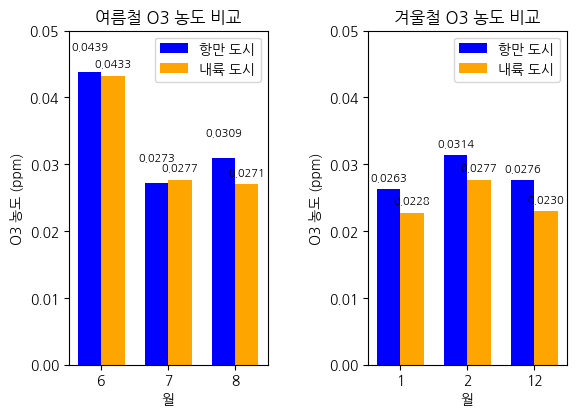

In [32]:
# 첫 번째 그래프 : 여름철 O3 농도 비교
plt.subplot(1, 2, 1) # 한 줄에 두 개의 그래프를 배치하기 위해서 & 해당 그래프 첫 번째에 배치

bar_width = 0.35  # 막대 너비 설정
index = range(len(summer_o3_port))  # x축의 위치 (데이터의 길이에 따라 범위 생성)

# 항만 도시와 내륙 도시의 막대를 각각 옆으로 위치시켜 그리기
bars_p = plt.bar(index, summer_o3_port['O3'], width=bar_width, color='blue', label='항만 도시') # 항만 도시의 그래프를 파란색으로 그리기
bars_i = plt.bar([i + bar_width for i in index], summer_o3_inland['O3'], width=bar_width, color='orange', label='내륙 도시') # 내륙 도시의 그래프 주황색으로 그리기 & 항만도시 막대 그래프 옆에 위치하기 위해 bar_width를 더하기

# 막대 위에 값 표시
for bar in bars_p:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.003, f'{bar.get_height():.4f}', # 막대 중간 x 좌표 계산 & 막대 높이 위에 값 표시 & 소수점 4자리까지 표시
             ha='center', va='bottom', fontsize=8)

for bar in bars_i:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{bar.get_height():.4f}',
             ha='center', va='bottom', fontsize=8)

plt.title('여름철 O3 농도 비교')
plt.xlabel('월')
plt.ylabel('O3 농도 (ppm)')
plt.xticks([i + bar_width / 2 for i in index], summer_o3_port.index)  # x축 위치가 막대 중앙에 위치하도록
plt.legend()

# y축 범위 설정
plt.ylim(0, 0.05)



# 두 번째 그래프 : 겨울철 O3 농도 비교
plt.subplot(1, 2, 2) # 한 줄에 두 개의 그래프를 배치하기 위해서 & 해당 그래프 첫 번째에 배치
index = range(len(winter_o3_port))  # x축의 위치 (데이터의 길이에 따라 범위 생성)

# 항만 도시와 내륙 도시의 막대를 각각 옆으로 위치시켜 그리기
bars1 = plt.bar(index, winter_o3_port['O3'], width=bar_width, color='blue', label='항만 도시') # 항만 도시 : 파란색
bars2 = plt.bar([i + bar_width for i in index], winter_o3_inland['O3'], width=bar_width, color='orange', label='내륙 도시') # 내륙 도시 : 주황색

# 막대 위에 값 표시
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{bar.get_height():.4f}', # 막대 중간 x 좌표 계산 & 막대 높이 위에 값 표시 & 소수점 4자리까지 표시
             ha='center', va='bottom', fontsize=8)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{bar.get_height():.4f}', # 막대 중간 x 좌표 계산 & 막대 높이 위에 값 표시 & 소수점 4자리까지 표시
             ha='center', va='bottom', fontsize=8)

plt.title('겨울철 O3 농도 비교')
plt.xlabel('월')
plt.ylabel('O3 농도 (ppm)')
plt.xticks([i + bar_width / 2 for i in index], winter_o3_port.index) # x축 위치가 막대 중앙에 위치하도록
plt.legend()

# y축 범위 설정
plt.ylim(0, 0.05)

plt.tight_layout(pad = 3) # 두 그래프 간의 간격 넓히기
plt.show()

#### **질문 2. 그래프 해석**

**[ *질문 : 해륙풍이 활발한 여름철과 북서풍이 우세한 겨울철 간 O3 농도 패턴은 어떻게 다른가?* ]**


**1. 항만도시와 내륙도시의 O3 농도 특성 비교**
- 여름철 O3 농도
    - 항만 도시 : 6월에 0.0439로 가장 높은 농도를 보이며, 이후 7~8월에 크게 감소합니다.
    - 내륙 도시 : 마찬가지로 6월에 0.0433으로 가장 높은 농도를 보이며, 7~8월에 감소합니다.
    - 해석 : 전반적으로 두 도시 모두 여름철에는 O3 농도가 높으며 6월과 8월에는 항만도시가 내륙도시보다 더 높은 농도를 유지합니다.

- 겨울철 O3 농도
    - 항만도시 : 2월에 0.0314로 가장 높은 농도를 보입니다.
    - 내륙도시 : 마찬가지로 2월에 0.0277로 가장 높은 농도를 보입니다.
    - 해석 : 겨울철에는 O3 농도가 여름철에 비해 전반적으로 낮으며, 항만 도시와 내륙 도시의 농도 차이가 여름철보다 뚜렷하며 항만 도시가 더 높은 경향을 보입니다.

**2. 계절 간 O3 농도 변화 패턴**
- 여름철
    - O3 농도가 가장 높게 나타납니다. 이는 햇빛과 온도가 높을수록 O3 생성이 촉진되기 때문입니다.

- 겨울철
    - O3농도가 감소합니다. 이는 낮은 온도와 일사량 감소로 인한 결과라고 보입니다.

**3. O3 농도 차이에 대한 요인 (추측)**
- 여름철에 항만 도시의 O3 농도가 높은 이유는 다양한 요인에 기인할 수 있습니다. 첫째, 교통량과 산업활동이 활발해져 대기 오염물질이 많이 발생하고, 둘째, 해륙풍에 의해 이러한 오염 물질이 항만 도시로 이동하기 때문입니다. 특히, 항만에서 선박 엔진에서 배출되는 가스와 물류 및 화물 운송으로 인한 가스가 O3 농도를 높이는데 큰 영향을 미칩니다. 셌째, 항만 주변에 위치한 석유 화학 공장이나 석유 정제시설, 화력발전소, 조선업 등의 시설에서 발생하는 대기 오염 물질도 O3 농도를 증가시키는 요인으로 작용할 수 있습니다.







**결론**  
항만 도시와 내륙 도시는 여름철에 오존(O3) 농도가 높습니다.   
특히, 항만 도시는 선박 배출가스와 산업 활동으로 인해 내륙  도시보다 더 높은 농도를 보입니다.   
겨울철에는 오존 농도가 감소하지만, 항만 도시는 여전히 내륙 도시보다 높은 농도를 유지합니다.   
이러한 차이는 항만 지역의 산업 및 교통 활동과 해륙풍의 영향이 주된 요인으로 작용하기 때문이라고 생각합니다.



---

### **3. 항만도시의 CO 농도가 출퇴근 시간대, 선박 입출항 시간대와 기타 시간대 간에 어떤 차이를 보이는가?**


항만도시의 CO 농도에 영향을 미치는 주요 요소로는 선박 활동과 육상 교통이 있습니다. 선박 입출항 시간대는 CO 배출의 중요한 원인 중 하나이며, 출퇴근 시간대의 차량 수는 육상 교통으로 인한 CO 농도를 증가시킬 수 있습니다. 이를 비교 분석하여 각 활동이 CO 농도에 미치는 영향을 명확히 이해하고, 항만 도시에서 CO 농도의 변화를 유발하는 주요 원인들을 파악할 수 있습니다.

In [33]:
# 기본 전처리 데이터프레임 복제
df_Q3 = df.copy()
df_Q3

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.0020,0.40,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.0020,0.40,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.0030,0.50,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.0030,0.50,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.0030,0.50,0.019,0.025,37.0,25.0,1,1,5,winter,항만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,합천군,238511,0.0025,0.47,0.032,0.012,13.0,11.0,12,31,20,winter,내륙
28268,합천군,238511,0.0029,0.47,0.033,0.009,12.0,12.0,12,31,21,winter,내륙
28269,합천군,238511,0.0025,0.46,0.033,0.009,13.0,15.0,12,31,22,winter,내륙
28270,합천군,238511,0.0025,0.47,0.030,0.009,16.0,14.0,12,31,23,winter,내륙


**출퇴근 시간대**

- 출근 시간 : 오전 7-9시
- 퇴근 시간 : 오후 5-7시

**선박 입출항 시간대**
- 1항차 : 9:00~12:00
- 2항차 : 14:00~17:00
- (거제시 선박 시간 참고 : https://geojefriends.modoo.at/?link=7gpg9dk1)


- 데이터 필터링 ( 도시유형-항만 )

In [34]:
# 도시 유형 항만만 필터링
df_port = df_Q3[df_Q3['도시 유형'] == '항만']
df_port[:5]

,지역,측정소코드,SO2,CO,O3,NO2,PM10,PM25,월,일,시간,계절,도시 유형
0,창원시,238111,0.002,0.4,0.026,0.022,32.0,27.0,1,1,1,winter,항만
1,창원시,238111,0.002,0.4,0.028,0.019,29.0,28.0,1,1,2,winter,항만
2,창원시,238111,0.003,0.5,0.025,0.020,33.0,24.0,1,1,3,winter,항만
3,창원시,238111,0.003,0.5,0.017,0.026,34.0,32.0,1,1,4,winter,항만
4,창원시,238111,0.003,0.5,0.019,0.025,37.0,25.0,1,1,5,winter,항만


In [35]:
df_port['지역'].unique() # 항만 도시만 잘 되었는지 체크

array(['창원시', '하동군', '거제시', '사천시', '통영시', '고성군', '남해군'], dtype=object)

- 두 가지 그래프를 살펴볼 것임
1. 시간에 따른 **지역별** 오존 농도 변화
2. 시간에 따른 **항만 도시의 전체 평균** 오존 농도 변화

**1. 시간에 따른 지역별 오존 농도 변화**

In [36]:
# 시간과 지역에 따라 CO값 평균 구하기
avg_co_by_city = df_port.groupby(['시간', '지역'])['CO'].mean().reset_index()
avg_co_by_city

,시간,지역,CO
0,1,거제시,0.421192
1,1,고성군,0.418219
2,1,남해군,0.439233
3,1,사천시,0.435808
4,1,창원시,0.425441
...,...,...,...
163,24,남해군,0.443205
164,24,사천시,0.432329
165,24,창원시,0.431364
166,24,통영시,0.409178


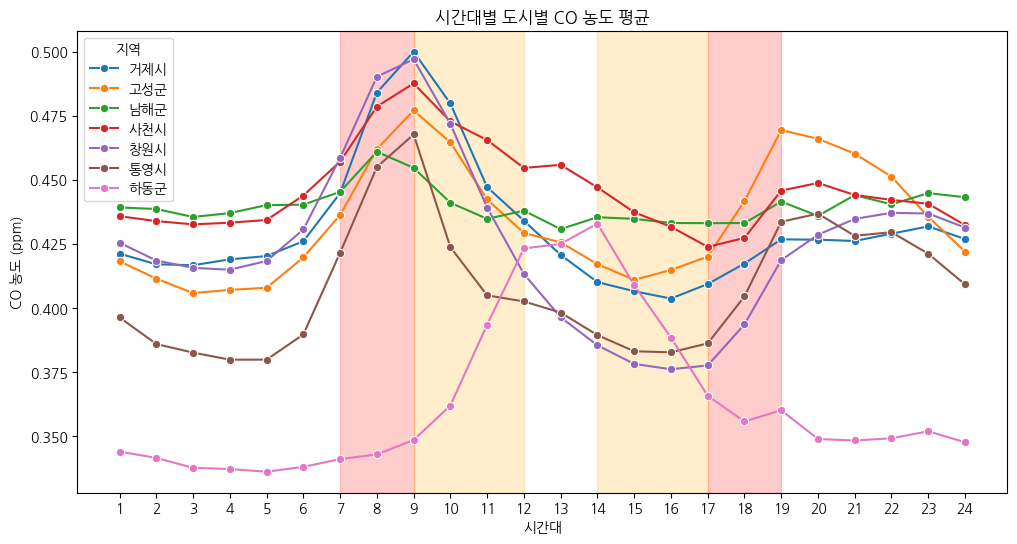

In [37]:
# 그래프 그리기
plt.figure(figsize=(12, 6)) # 그래프 크기 설정 12 X 6

# 출퇴근 시간대 빨간색 배경 설정
plt.axvspan(7, 9, color='red', alpha=0.2)  # 출퇴근 시간대 (7~9시)
plt.axvspan(17, 19, color='red', alpha=0.2)  # 출퇴근 시간대 (17~19시)

# 입출항 시간대 주황색 배경 설정
plt.axvspan(9, 12, color='orange', alpha=0.2)  # 입출항 시간대 (9~12시)
plt.axvspan(14, 17, color='orange', alpha=0.2)  # 입출항 시간대 (14~17시)

# 꺾은선 그래프 그리기
sns.lineplot(data=avg_co_by_city, x='시간', y='CO', hue='지역', marker='o')  # x축은 '시간' 컬럼 이용 / y축은 'CO' 컬럼 이용 / hue='지역' : 지역에 따라 다른 색상 사용 / marker='o' : 원형 마커 표시
plt.title('시간대별 도시별 CO 농도 평균')
plt.xlabel('시간대')
plt.ylabel('CO 농도 (ppm)')
plt.legend(title='지역')
plt.xticks(range(1, 25)) # x축을 1~24시로 설정

# 그래프 표시
plt.show()

**2.시간에 따른 항만 도시의 전체 오존 평균 농도 변화**
- 위 그래프에서 하동군이 이상치처럼 다른 도시에 비해 현저히 낮은 값을 보이기 때문에 하동군을 제외하고 평균 비교

In [38]:
# 하동군을 제외한 6개의 지역만 비교하기 위해 하동군 제외

df_port = df_port[df_port['지역'] != '하동군']
df_port['지역'].unique() # 하동군이 제외되었는지 확인

array(['창원시', '거제시', '사천시', '통영시', '고성군', '남해군'], dtype=object)

In [39]:
# 시간에 따라 CO값 평균 구하기
avg_co_by_time = df_port.groupby(['시간'])['CO'].mean().reset_index()
avg_co_by_time

,시간,CO
0,1,0.424832
1,2,0.418990
2,3,0.416397
3,4,0.416321
4,5,0.418830
5,6,0.429154
6,7,0.452483
7,8,0.482682
8,9,0.490904
9,10,0.467849


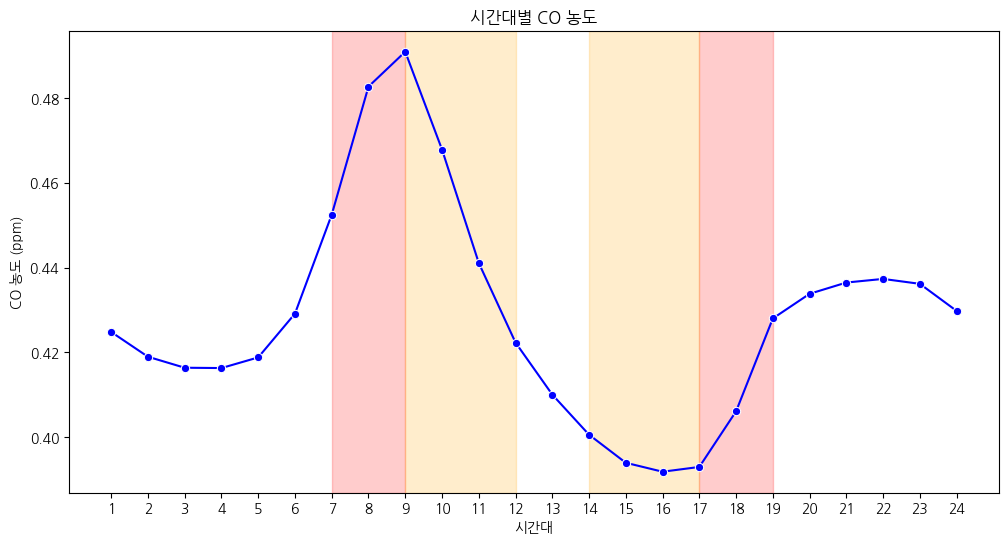

In [40]:
plt.figure(figsize=(12, 6)) # 그래프 크기 설정

# 기본 라인플롯 그리기 (파란색)
sns.lineplot(data=avg_co_by_time, x='시간', y='CO', marker='o', color='blue') # x축은 시간, y축은 CO로, 마커는 원형으로 그래프 색상은 파란색으로 설정

# 출퇴근 시간대 빨간색 배경 설정
plt.axvspan(7, 9, color='red', alpha=0.2)  # 출근 시간대 (7~9시)
plt.axvspan(17, 19, color='red', alpha=0.2)  # 퇴근 시간대 (17~19시)

# 입출항 시간대 주황색 배경 설정
plt.axvspan(9, 12, color='orange', alpha=0.2)  # 1차 입출항 시간대 (9~12시)
plt.axvspan(14, 17, color='orange', alpha=0.2)  # 2차 입출항 시간대 (14~17시)

plt.title('시간대별 CO 농도')
plt.xlabel('시간대')
plt.ylabel('CO 농도 (ppm)')
plt.xticks(range(1, 25)) # 1~24로 x축에 표시
plt.show()

#### **질문 3. 그래프 해석**

**[ *질문 : 항만도시의 CO 농도가 출퇴근 시간대와 선박 입출항 시간대에 어떤 차이를 보이는가?* ]**

***시간대별 도시별 CO 농도 그래프 해석 (첫 번째 그래프)***
- 출퇴근 시간대 (7\~9시 / 17\~19시) : 오전 출근 시간대(7\~9시)에는 CO 농도가 급격히 상승하여 9시에 최고점(약 0.495 ppm)에 도달합니다. 특히, 거제시와 창원시에서 상대적으로 더 큰 증가를 관찰할 수 있습니다. 오후 퇴근 시간대 (17\~19시)에도 비슷한 상승세를 보이며, **이는 교통량 증가와 관련 있다고 보여지며, 자동차의 배기가스 배출이 주요 원인일 수 있습니다.**


- 입출항 시간대 (9\~12시 / 14시\~17시) : 선박 활동이 활발한 1차 입출항 시간대에는 다른 시간대에 비해 CO 농도가 높게 유지되지만 점차 감소하는 추세를 보입니다. 2차 입출항 시간대에는 CO 농도가 다시 낮아지는 것을 볼 수 있으며, 이를 통해 **선박 활동이 CO 농도에 미치는 영향이 크지 않음**을 알 수 있습니다.

- 기타 시간대 : 새벽(1\~6시)과 심야(21시\~24시) 시간대에는 CO 농도가 낮은 것으로 관찰됩니다.  이는 해당 시간대에 교통량이 감소하고 항만 작업도 상대적으로 적기 떄문입니다. 특히, 하동군과 같이 교통 및 산업 활동이 적은 지역에서는 새벽 시간대에 CO농도가 매우 낮은 수준을 보입니다.

- **특이사항 : 하동군은 다른 지역과 달리 평균 CO 농도가 낮은 것으로 관찰됩니다. 이는 하동군이 교통 및 항만 활동의 영향이 적고, 산과 강에 둘러싸인 자연환경 중심의 지역 특성을 가지고 있기 때문입니다. 하동군 문화관광 사이트에서도 주로 자연 경관을 강조하고 있습니다. (하동군 문화관광 사이트 : https://www.hadong.go.kr/tour.web )**

***시간대별 CO농도 그래프 해석 (두 번째 그래프)***

- 출퇴근 시간대 : 출퇴근 시간대에 해당하는 붉은 배경의 그래프를 보면 CO 농도가 급격히 상승하는 모습을 확인할 수 있습니다. 이는 교통량 증가로 인해 자동차 배기가스 배출량이 증가하기 때문입니다.   특히, 아침 7\~9시에 CO 농도가 최고점을 기록하고 있습니다.

- 낮 시간대 : 낮 시간대(10\~16시)에는 교통량이 감소하며 CO 농도가 급격히 하락하는 모습을 보여줍니다.

- 밤 시간대 : CO 농도가 서서히 증가하는 경향을 보입니다. 이는 대형 선박 입출항 활동 및 야간 화물차 운행에 의한 것으로 추정됩니다.

**결론**

항만 도시에서는 출퇴근 시간대에 CO 농도가 급격히 상승하는 현상이 관찰되며, 이는 주로 자동차 배기가스의 영향으로 보입니다. 반면, 입출항 시간대에는 CO 농도가 크게 증가하지 않으며, 오히려 저녁 시간대인 20~24시에 다소 높은 CO 농도를 유지하는 것으로 보아, 입출항 시간보다는 새벽에 이루어지는 대형 선박 입출항 활동 및 야간 화물차 운행 등이 CO 농도에 영향을 미치는 것으로 추정됩니다.

하동군과 같은 지역은 교통 및 산업 활동이 적어 CO 농도가 낮게 유지되는 특징을 보입니다. 이러한 차이는 각 지역의 사업 및 교통 활동 수준과 지역적 특성에 기인하는 것으로 해석됩니다. **따라서, 항만 도시의 대기질 관리를 위해서는 교통량 조절과 함께 대형 선박 및 화물차의 운행 관리가 중요하며, 하동군과 같은 자연환경 중심의 지역에서는 지속적인 환경 보호 노력이 필요합니다.**